In [3]:
from fastbook import *
from  duckduckgo_search import DDGS

Step 1: Download images of birds and non-birds

In [4]:
from duckduckgo_search import *
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}' ")
    with DDGS() as ddgs:
        keywords = term
        return L(ddgs.images(term, max_results=max_images, license_image='ShareCommercially')).itemgot('image')

In [5]:
urls = search_images('bird photos', max_images=1)
urls[0]

Searching for 'bird photos' 


/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_4750/2654051221.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


'http://upload.wikimedia.org/wikipedia/commons/3/39/Mountain_Blue_Bird_5_(8045047207).jpg'

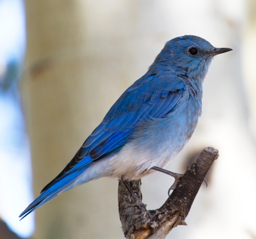

In [17]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0],dest,show_progress = False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'forest photos' 


/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_4750/2654051221.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


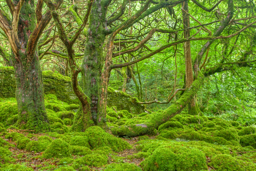

In [7]:
download_url(search_images('forest photos',max_images=1)[0], 'forest.jpg',show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [8]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)

    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)

    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)

    resize_images(path/o, max_size=400, dest=path/o)


Searching for 'forest photo' 


/var/folders/t3/ctmyp9cd5j7ctjhqp2_g843h0000gn/T/ipykernel_4750/2654051221.py:6: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:


Searching for 'forest sun photo' 
Searching for 'forest shade photo' 
Searching for 'bird photo' 
Searching for 'bird sun photo' 
Searching for 'bird shade photo' 


Step 2: Train our model

In [9]:
# Remove the photos that cause model training to fail

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

DataLoaders: An object that contains a training set (create model) and a validation set (check accuracy of the model)

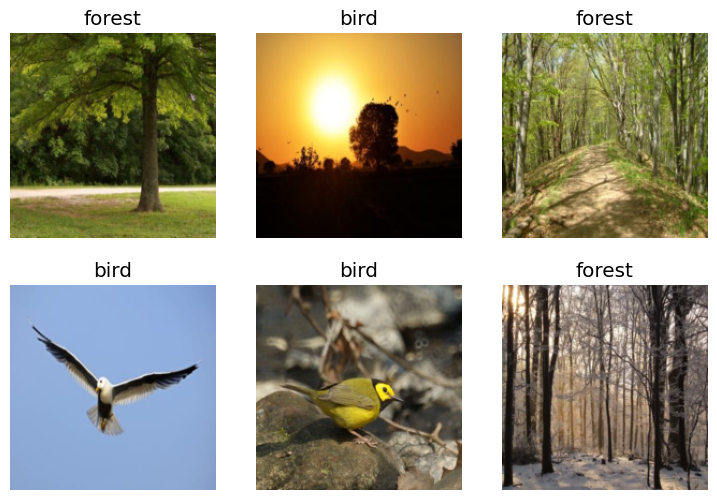

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    # Split data into training and validation sets randomly, 80% : 20%
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [15]:
# Train the model using resnet18 computer vision model
learn = vision_learner(dls, resnet18, metrics=error_rate)
# Use best practices for fine tuning a pre-trained model
learn.fine_tune(3)

Step 3: Use the model

In [19]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9998
